In [1]:
from thermalcognition.reader import *
from thermalcognition.align import *
from matplotlib import pyplot as plt
import skimage.io
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# On thermal images

A manual region of interest (ROI) must be selected.

In [2]:
video_path = r"../data/FLIR0131.csq"
video_flir = read_flir_video(video_path)

100%|██████████| 361/361 [00:02<00:00, 131.32it/s]


In [3]:
frame_index = 0
image = video_flir[frame_index]
left= 182
top = 7
right= 438
bottom = 263
crops = left, top, right, bottom
face = crop_face(image, crops=crops)

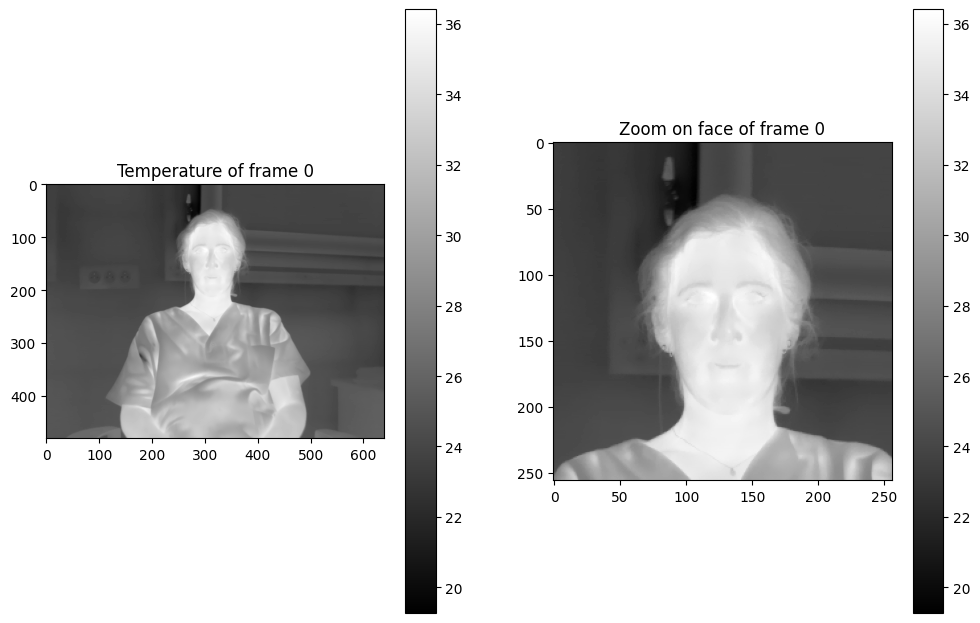

In [4]:
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Temperature of frame {0}".format(frame_index))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(face, cmap="gray")
plt.title("Zoom on face of frame {0}".format(frame_index))
plt.colorbar()

# On visible images

Demonstration on VIS-TH images database.

In [14]:
face_detector_path = r"../weights/s3fd-619a316812.pth"
visible_image_path = r"../data/VIS_001_1_01_NN.jpg"
thermal_image_path = r"../data/TH_001_1_01_NN.tiff"

In [15]:
visible_image = skimage.io.imread(visible_image_path)
thermal_image = skimage.io.imread(thermal_image_path)
thermal_image = 0.01*(thermal_image-273.15) #in celsius
visible_image = resize_visible_flirone(visible_image, thermal_image)

In [16]:
bboxlist = get_crops(visible_image, face_detector_path, device="cpu")
crops = np.array(bboxlist[:4], dtype="int")
visible_face = crop_face(visible_image, crops=crops, mode="visible")

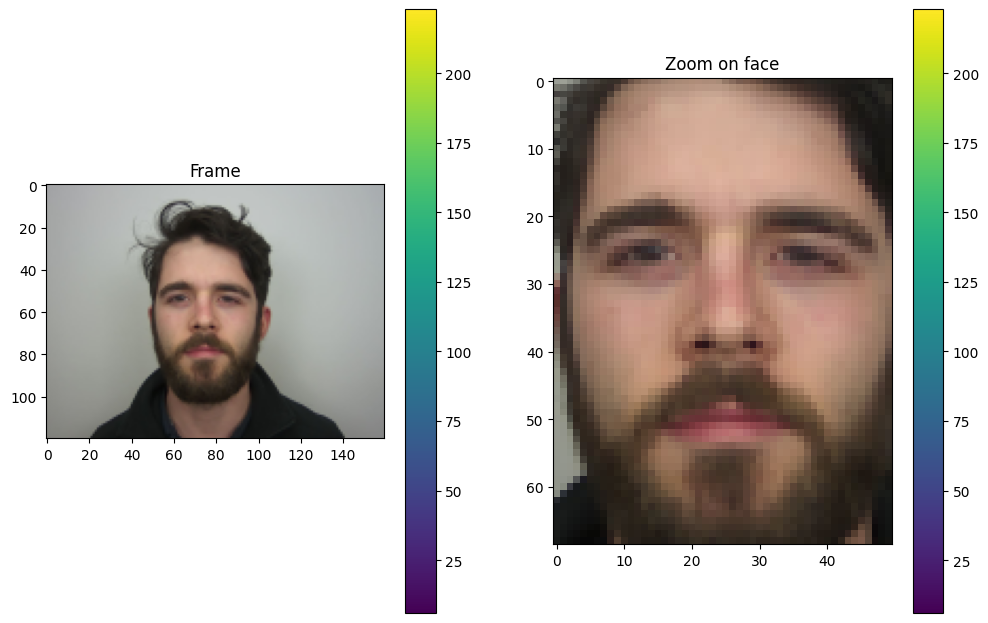

In [17]:
plt.subplot(1,2,1)
plt.imshow(visible_image)
plt.title("Frame")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(visible_face)
plt.title("Zoom on face")
plt.colorbar()

In [18]:
thermal_face = crop_face(thermal_image, crops=crops)

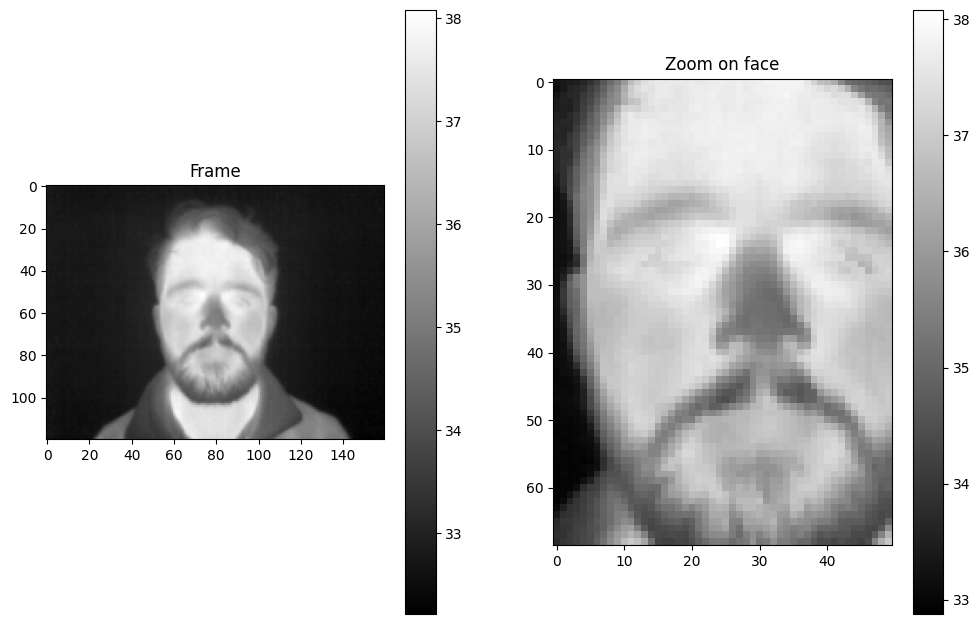

In [19]:
plt.subplot(1,2,1)
plt.imshow(thermal_image, cmap="gray")
plt.title("Frame")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(thermal_face, cmap="gray")
plt.title("Zoom on face")
plt.colorbar()

There is a disalignment between thermal and visible images. Template matching can fix this

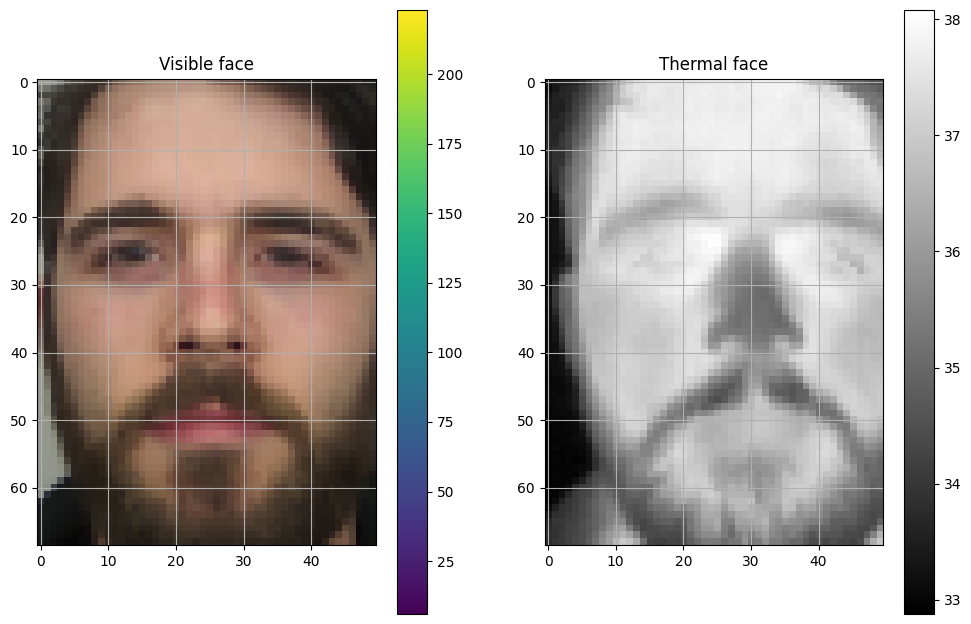

In [20]:
plt.subplot(1,2,1)
plt.imshow(visible_face)
plt.grid()
plt.title("Visible face")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(thermal_face, cmap="gray")
plt.grid()
plt.title("Thermal face")
plt.colorbar()

In [21]:
visible_face, thermal_face = face_template_matching(visible_image, thermal_image, bboxlist, device="cpu")

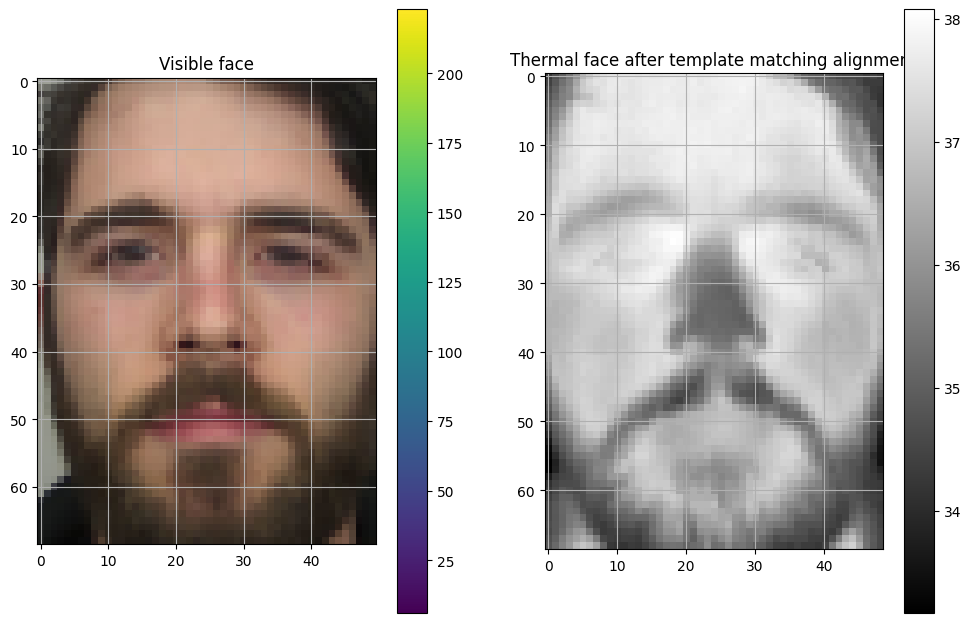

In [23]:
plt.subplot(1,2,1)
plt.imshow(visible_face)
plt.grid()
plt.title("Visible face")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(thermal_face, cmap="gray")
plt.grid()
plt.title("Thermal face after template matching alignment")
plt.colorbar()

# Directly on thermal image

In [6]:
thermal_image_path = r"../data/TH_001_1_01_NN.tiff"
face_detector_path = r"../weights/s3fd-619a316812.pth"
thermal_image = skimage.io.imread(thermal_image_path).astype("float64")
# VIS-TH Database transformation
thermal_image = 0.01*(thermal_image-273.15) #in celsius
thermal_image = 255*(thermal_image - 30)/(40-30)# scale from 25°C-38°C to 0-255
# bboxlist = detect(face_detector, np.expand_dims(thermal_image, axis=2), device=device)[0]
bboxlist = get_crops(np.expand_dims(thermal_image, axis=2), face_detector_path, device="cpu")
# x1,y1, x2, y2, confidence = bboxlist[0]
# face_thermal, center_thermal, scale_thermal = preprocess_face(thermal_image, (x1, y1, x2, y2))
# pts_thermal = predict_landmarks(face_thermal)

In [10]:
crops = np.array(bboxlist[:4], 'int')
face = crop_face(thermal_image, crops=crops, mode="thermal")

In [ ]:
plt.imshow(face)
plt.grid()
plt.title("Face")
plt.imshow(face, cmap="gray")
plt.colorbar()

In [ ]:
bboxlist

In [ ]:
video_path = r"../data/FLIR0131.csq"
video_flir = read_flir_video(video_path)

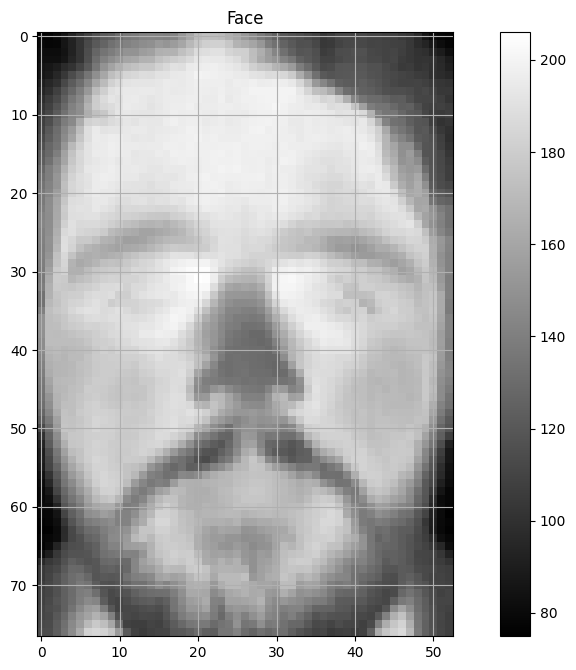

In [13]:
video_path = r"../data/FLIR0131.csq"
video_flir = read_flir_video(video_path)

In [7]:
bboxlist

array([ 53.198853  ,  21.455803  , 106.42912   ,  98.39138   ,
         0.98243326], dtype=float32)

In [8]:
video_path = r"../data/FLIR0131.csq"
video_flir = read_flir_video(video_path)

100%|██████████| 361/361 [00:02<00:00, 132.93it/s]
